In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings ("ignore")

In [2]:
import os
print(os.getcwd())


c:\Users\leiha\OneDrive\Documents\galaxy-classification-project\notebooks


In [5]:

df=pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\galaxy-classification-project\sdss_100k_galaxy_form_burst.csv",comment='#')

In [6]:
print(df.head())

                 objid            specobjid          ra       dec           u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177    21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072    20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003    23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059    20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217 -9999.00000   

            g         r         i         z  modelFlux_u  ...  psfMag_z  \
0    20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1    19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2    21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3    18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
4 -9999.00000  18.37762  18.13383  17.78497     0.000000  ...  19.02880   

       expAB_u      expAB_g   expAB_r   expAB_i   expAB_z   cl

In [7]:
print(df.shape)

(100000, 43)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [9]:
df.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [10]:
# oridinal encoding replace subclass with a 0/1 for classification
df['subclass'].replace(['STARFORMING', 'STARBURST'], [0,1], inplace=True)

In [11]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


In [12]:
sub = df["subclass"].value_counts()
sub.index.name = None     # remove index name
sub.name = "subclass"     # rename series
print(sub)



0    74993
1    25007
Name: subclass, dtype: int64


array([<Axes: ylabel='subclass'>], dtype=object)

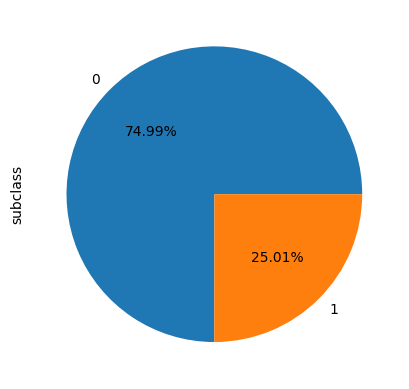

In [13]:
sub.plot(kind="pie", subplots=True, autopct="%1.2f%%")


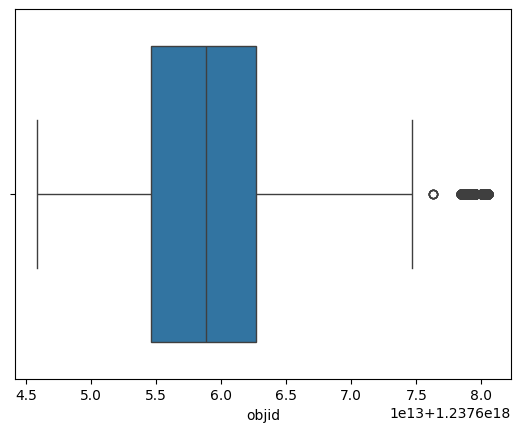

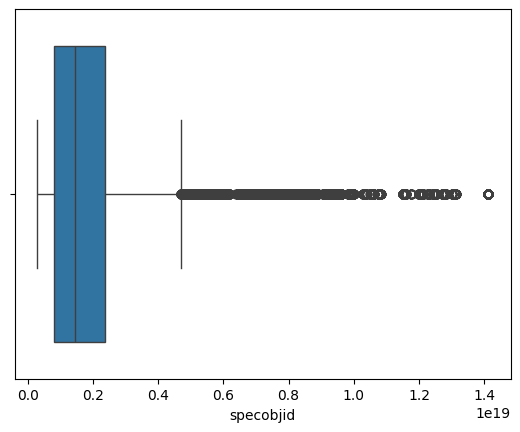

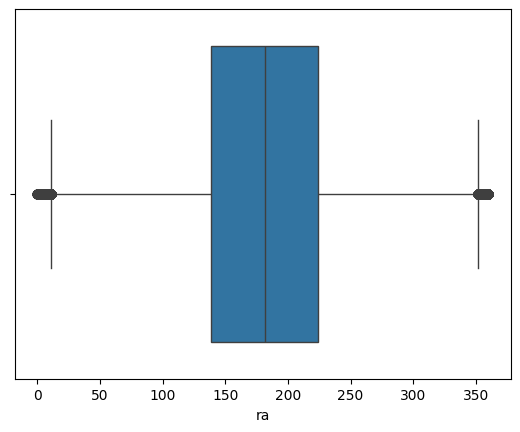

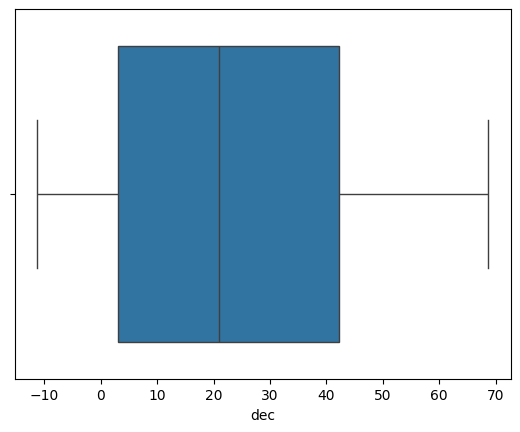

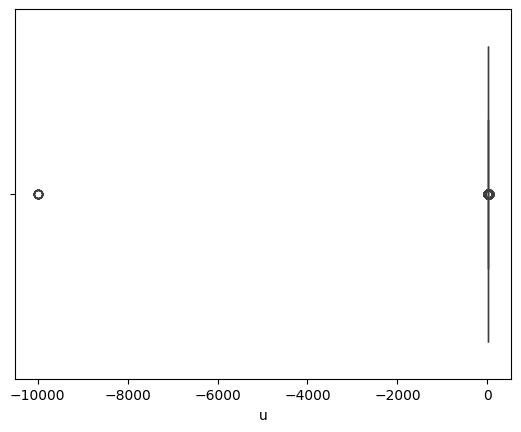

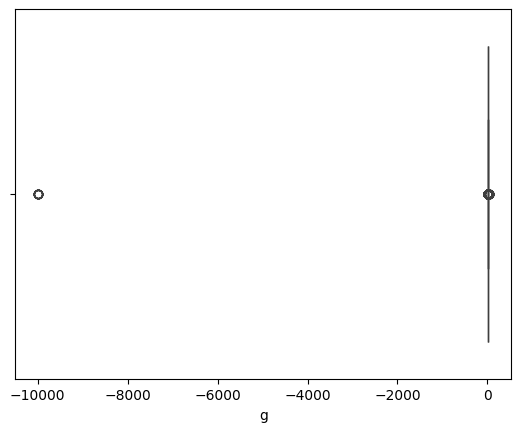

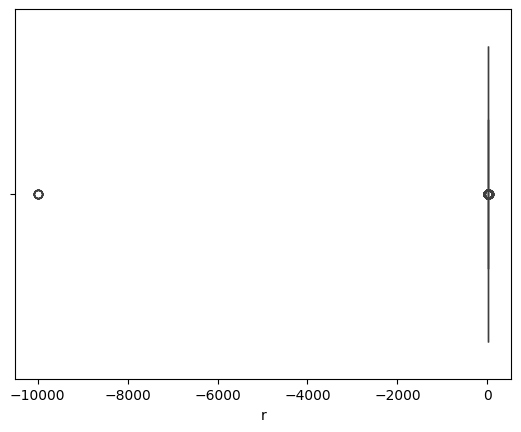

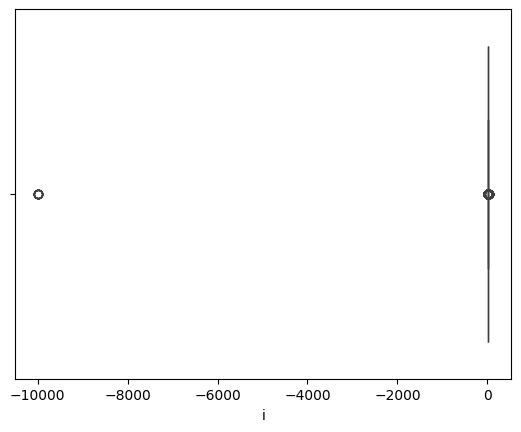

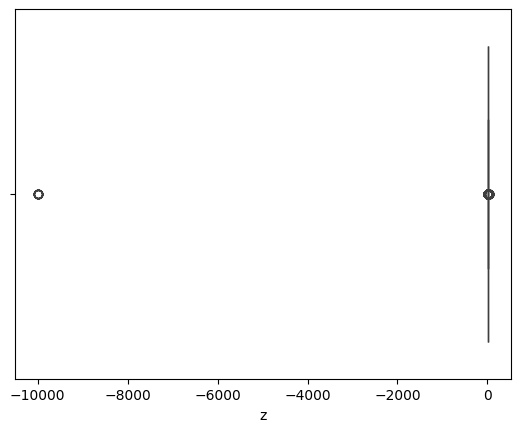

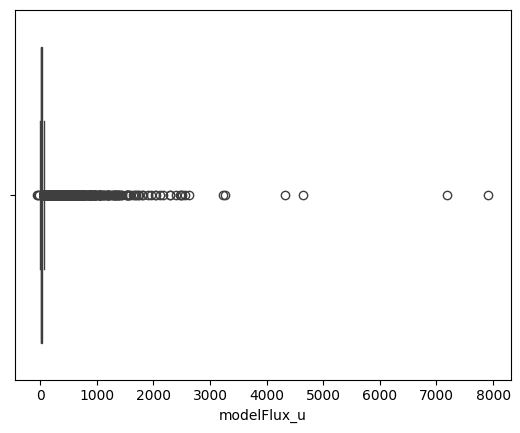

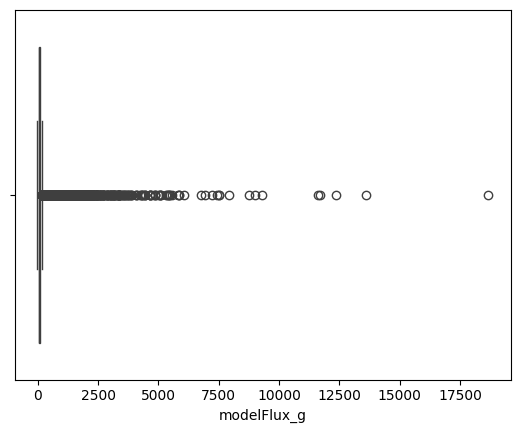

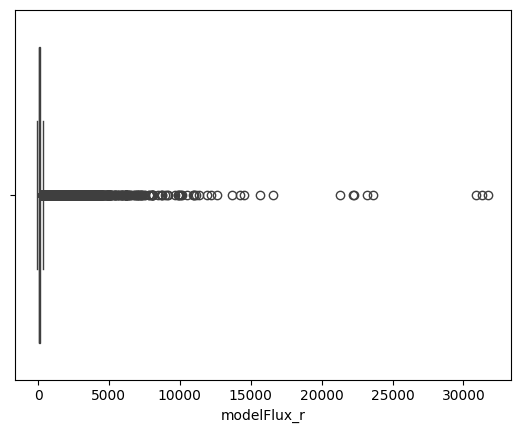

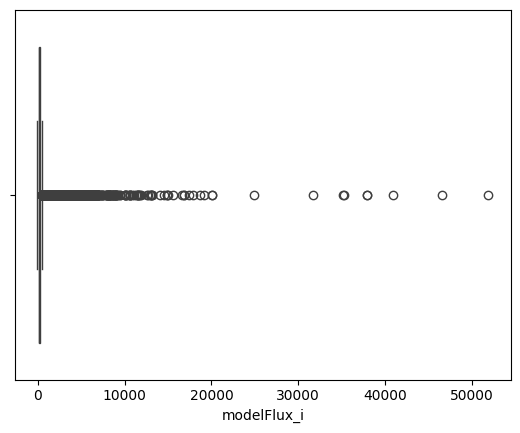

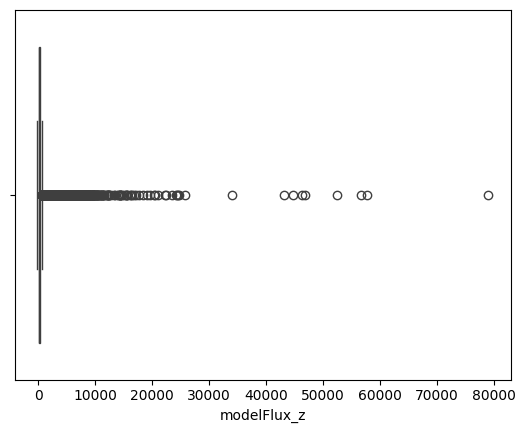

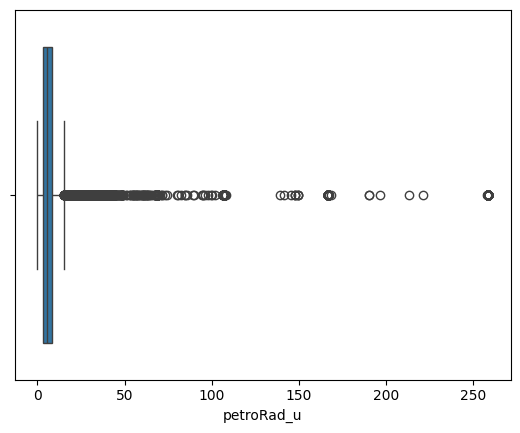

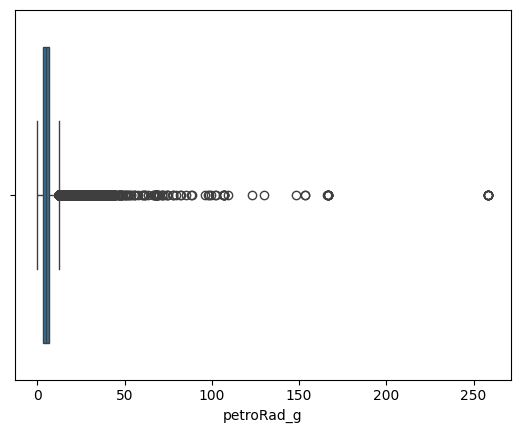

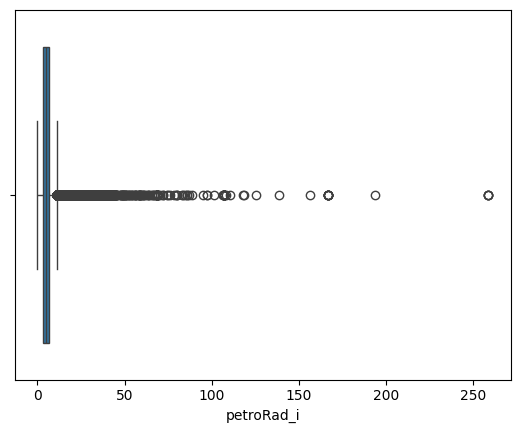

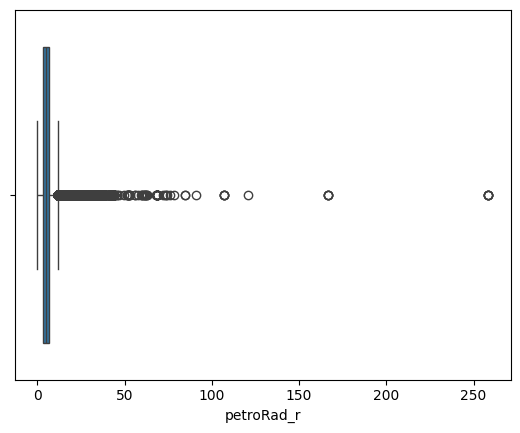

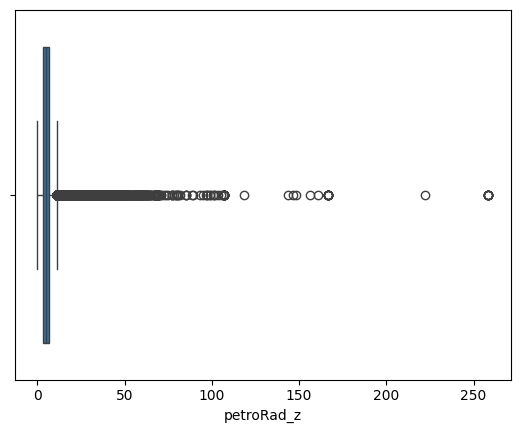

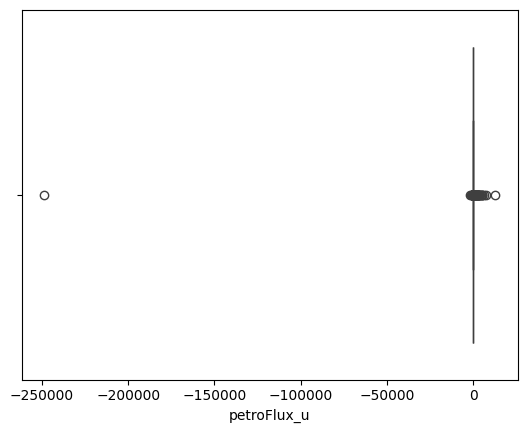

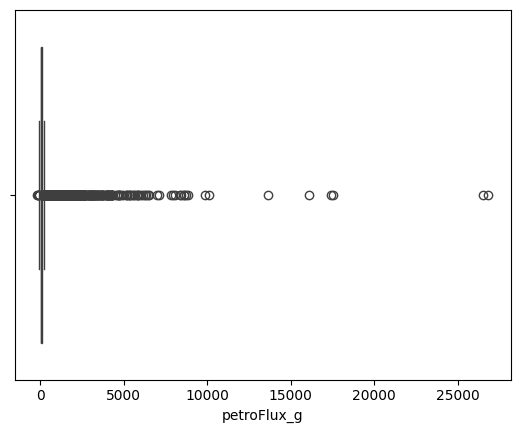

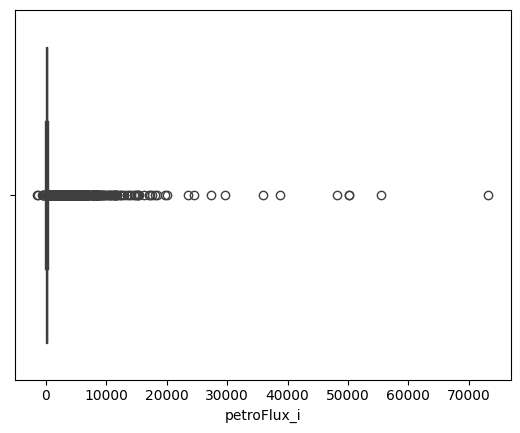

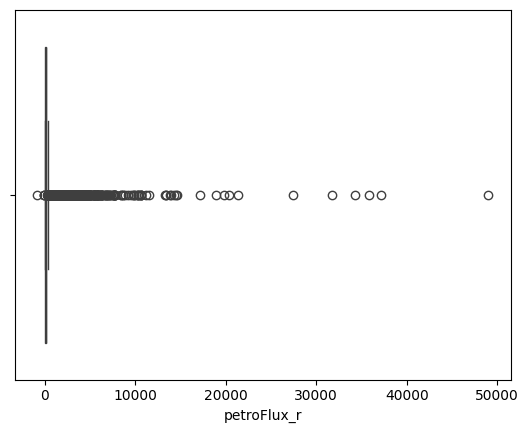

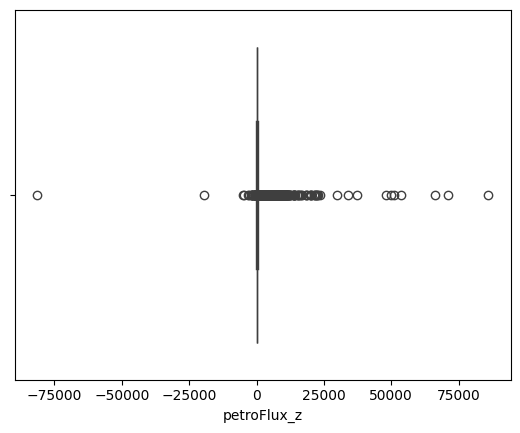

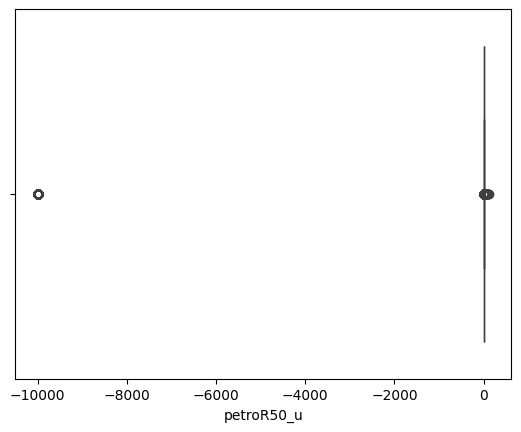

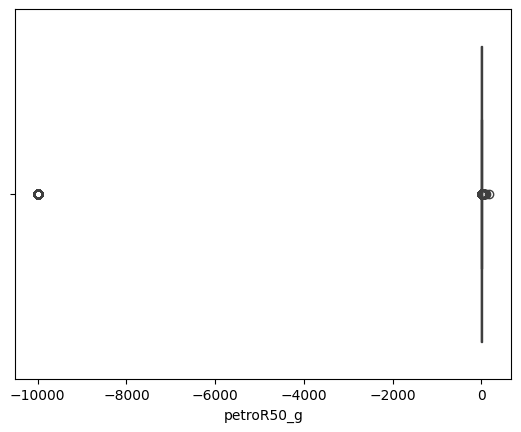

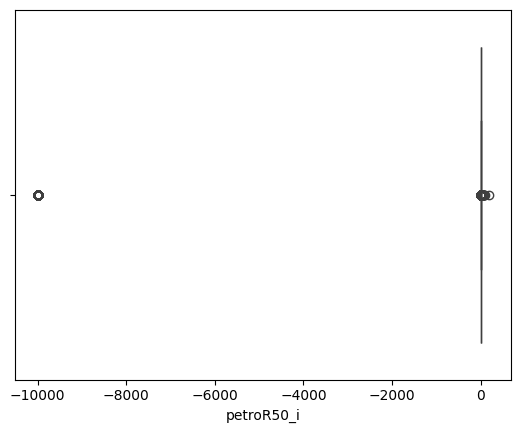

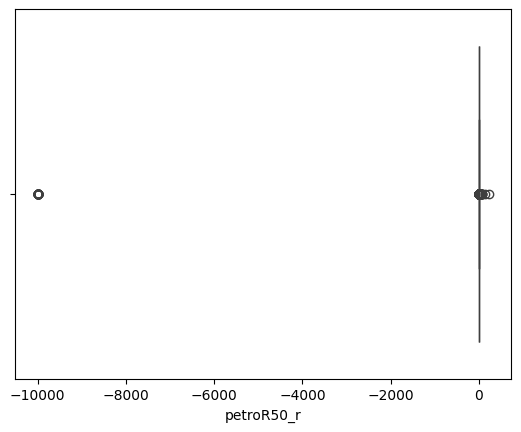

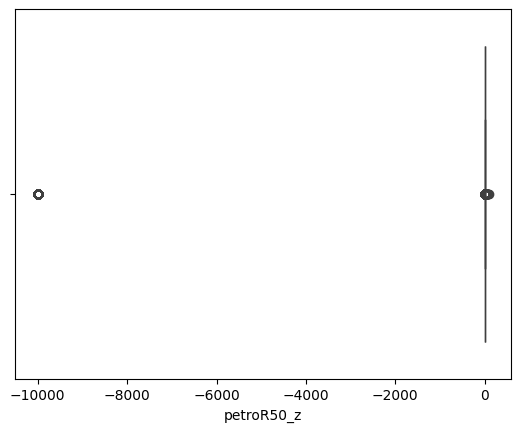

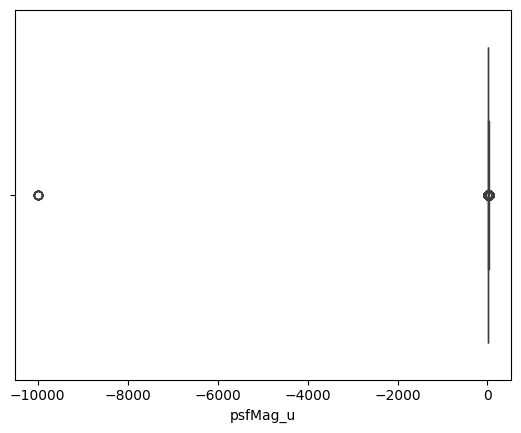

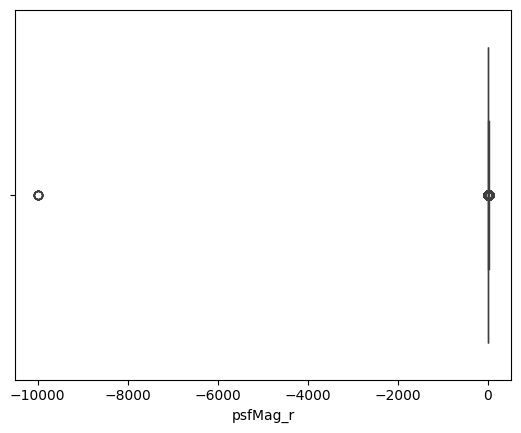

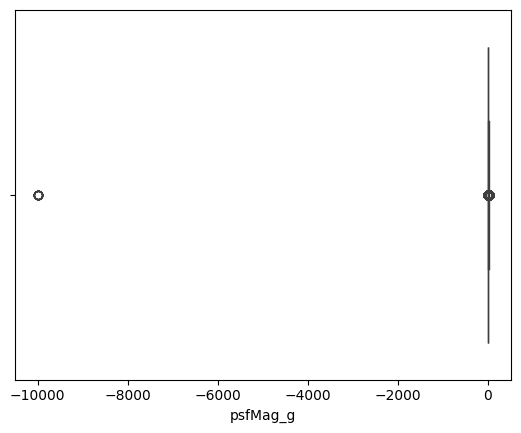

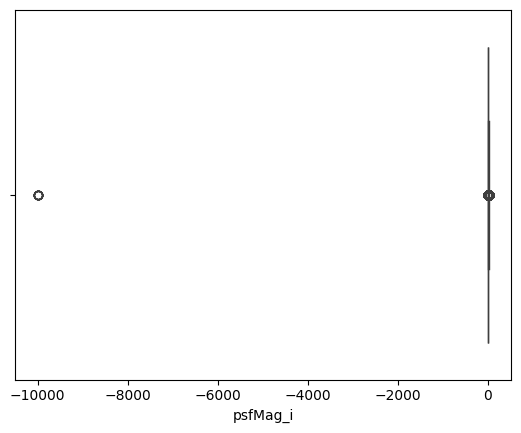

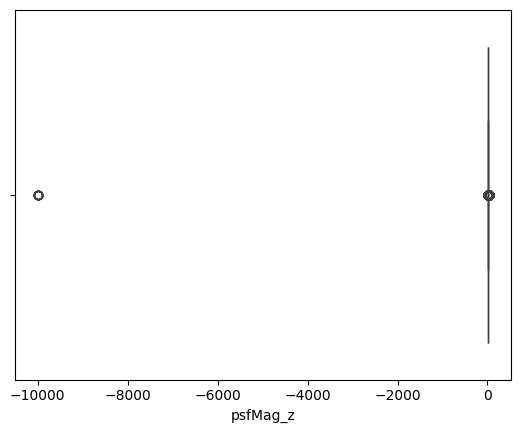

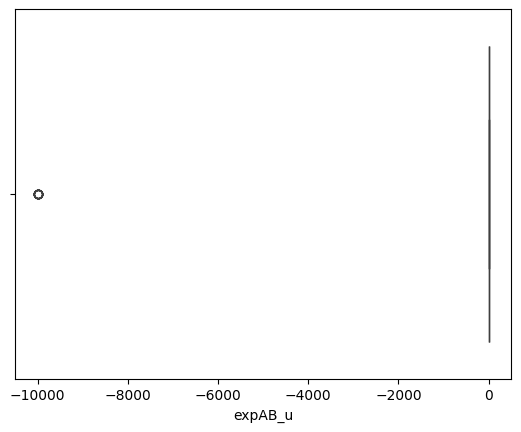

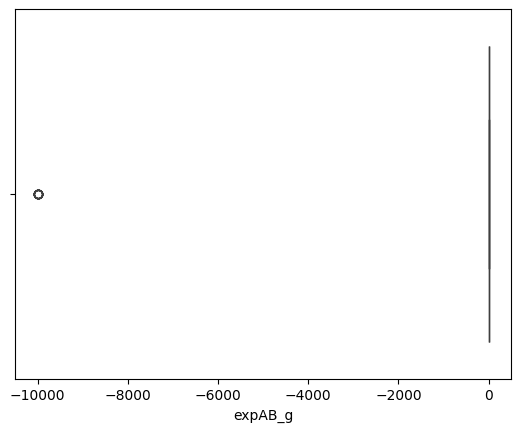

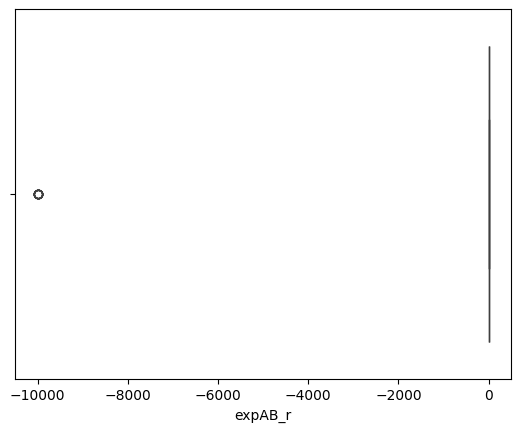

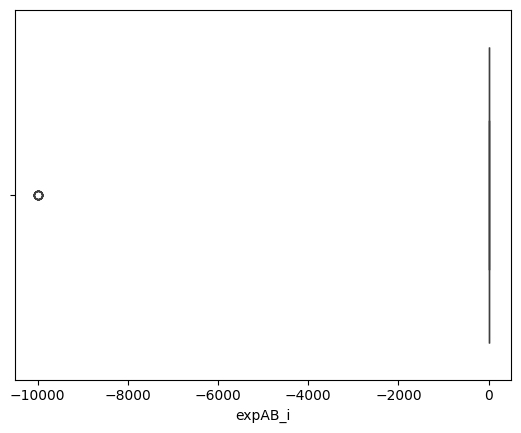

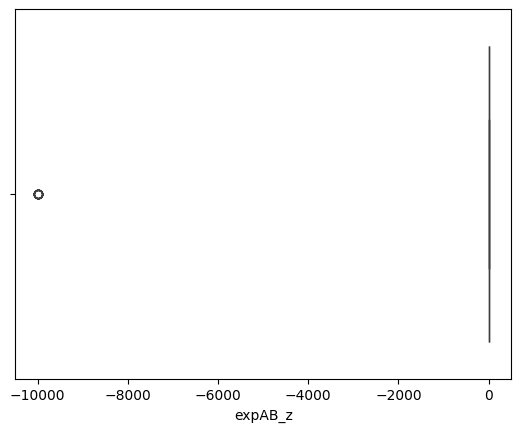

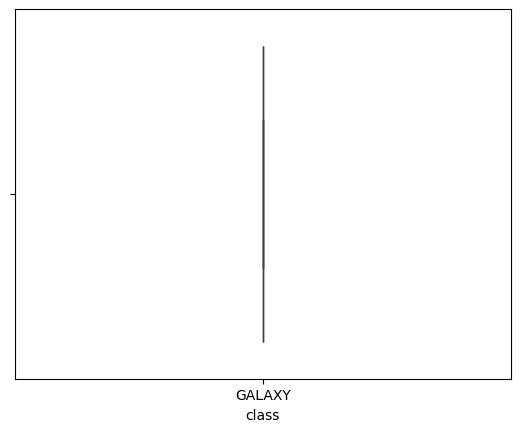

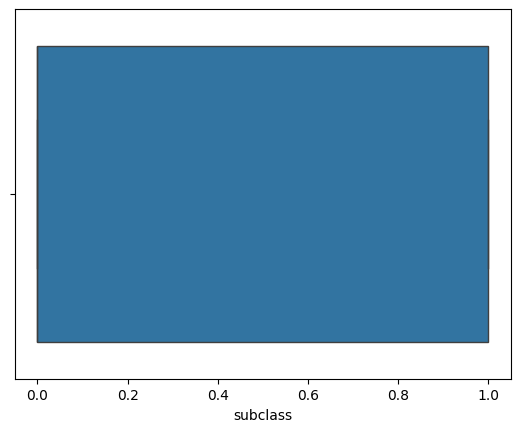

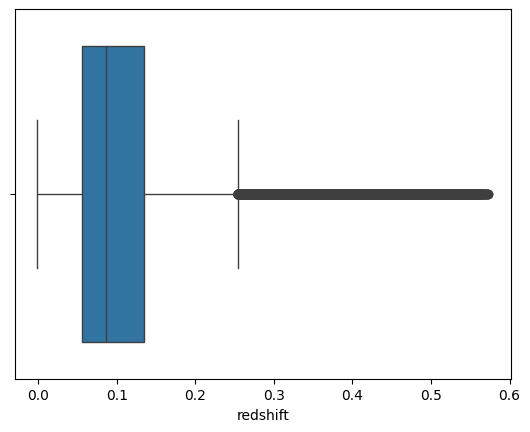

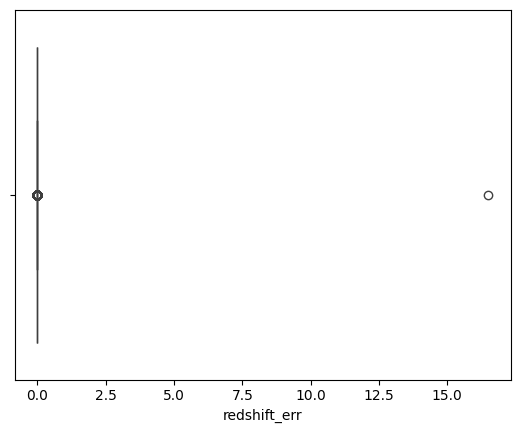

In [14]:
def func(col):
    sns.boxplot(x=col, data=df)
    plt.show()
for i in df.columns:
    func(i)

<Axes: xlabel='subclass', ylabel='i'>

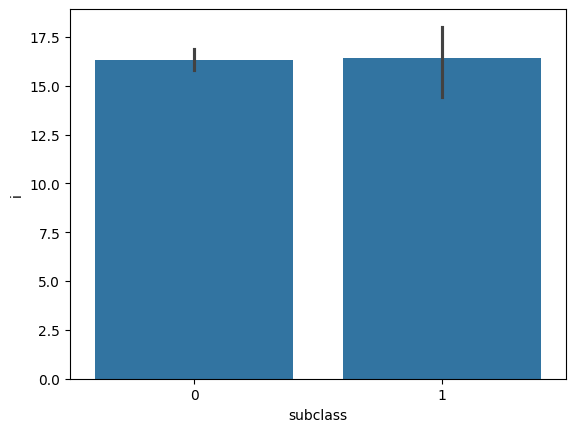

In [15]:
#Bivariate Analysis
sns.barplot(x='subclass', y='i', data=df)

<Axes: xlabel='subclass', ylabel='z'>

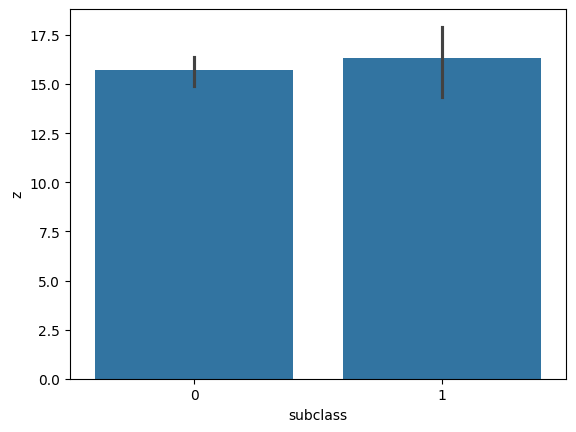

In [16]:
sns.barplot(x='subclass', y='z', data=df)

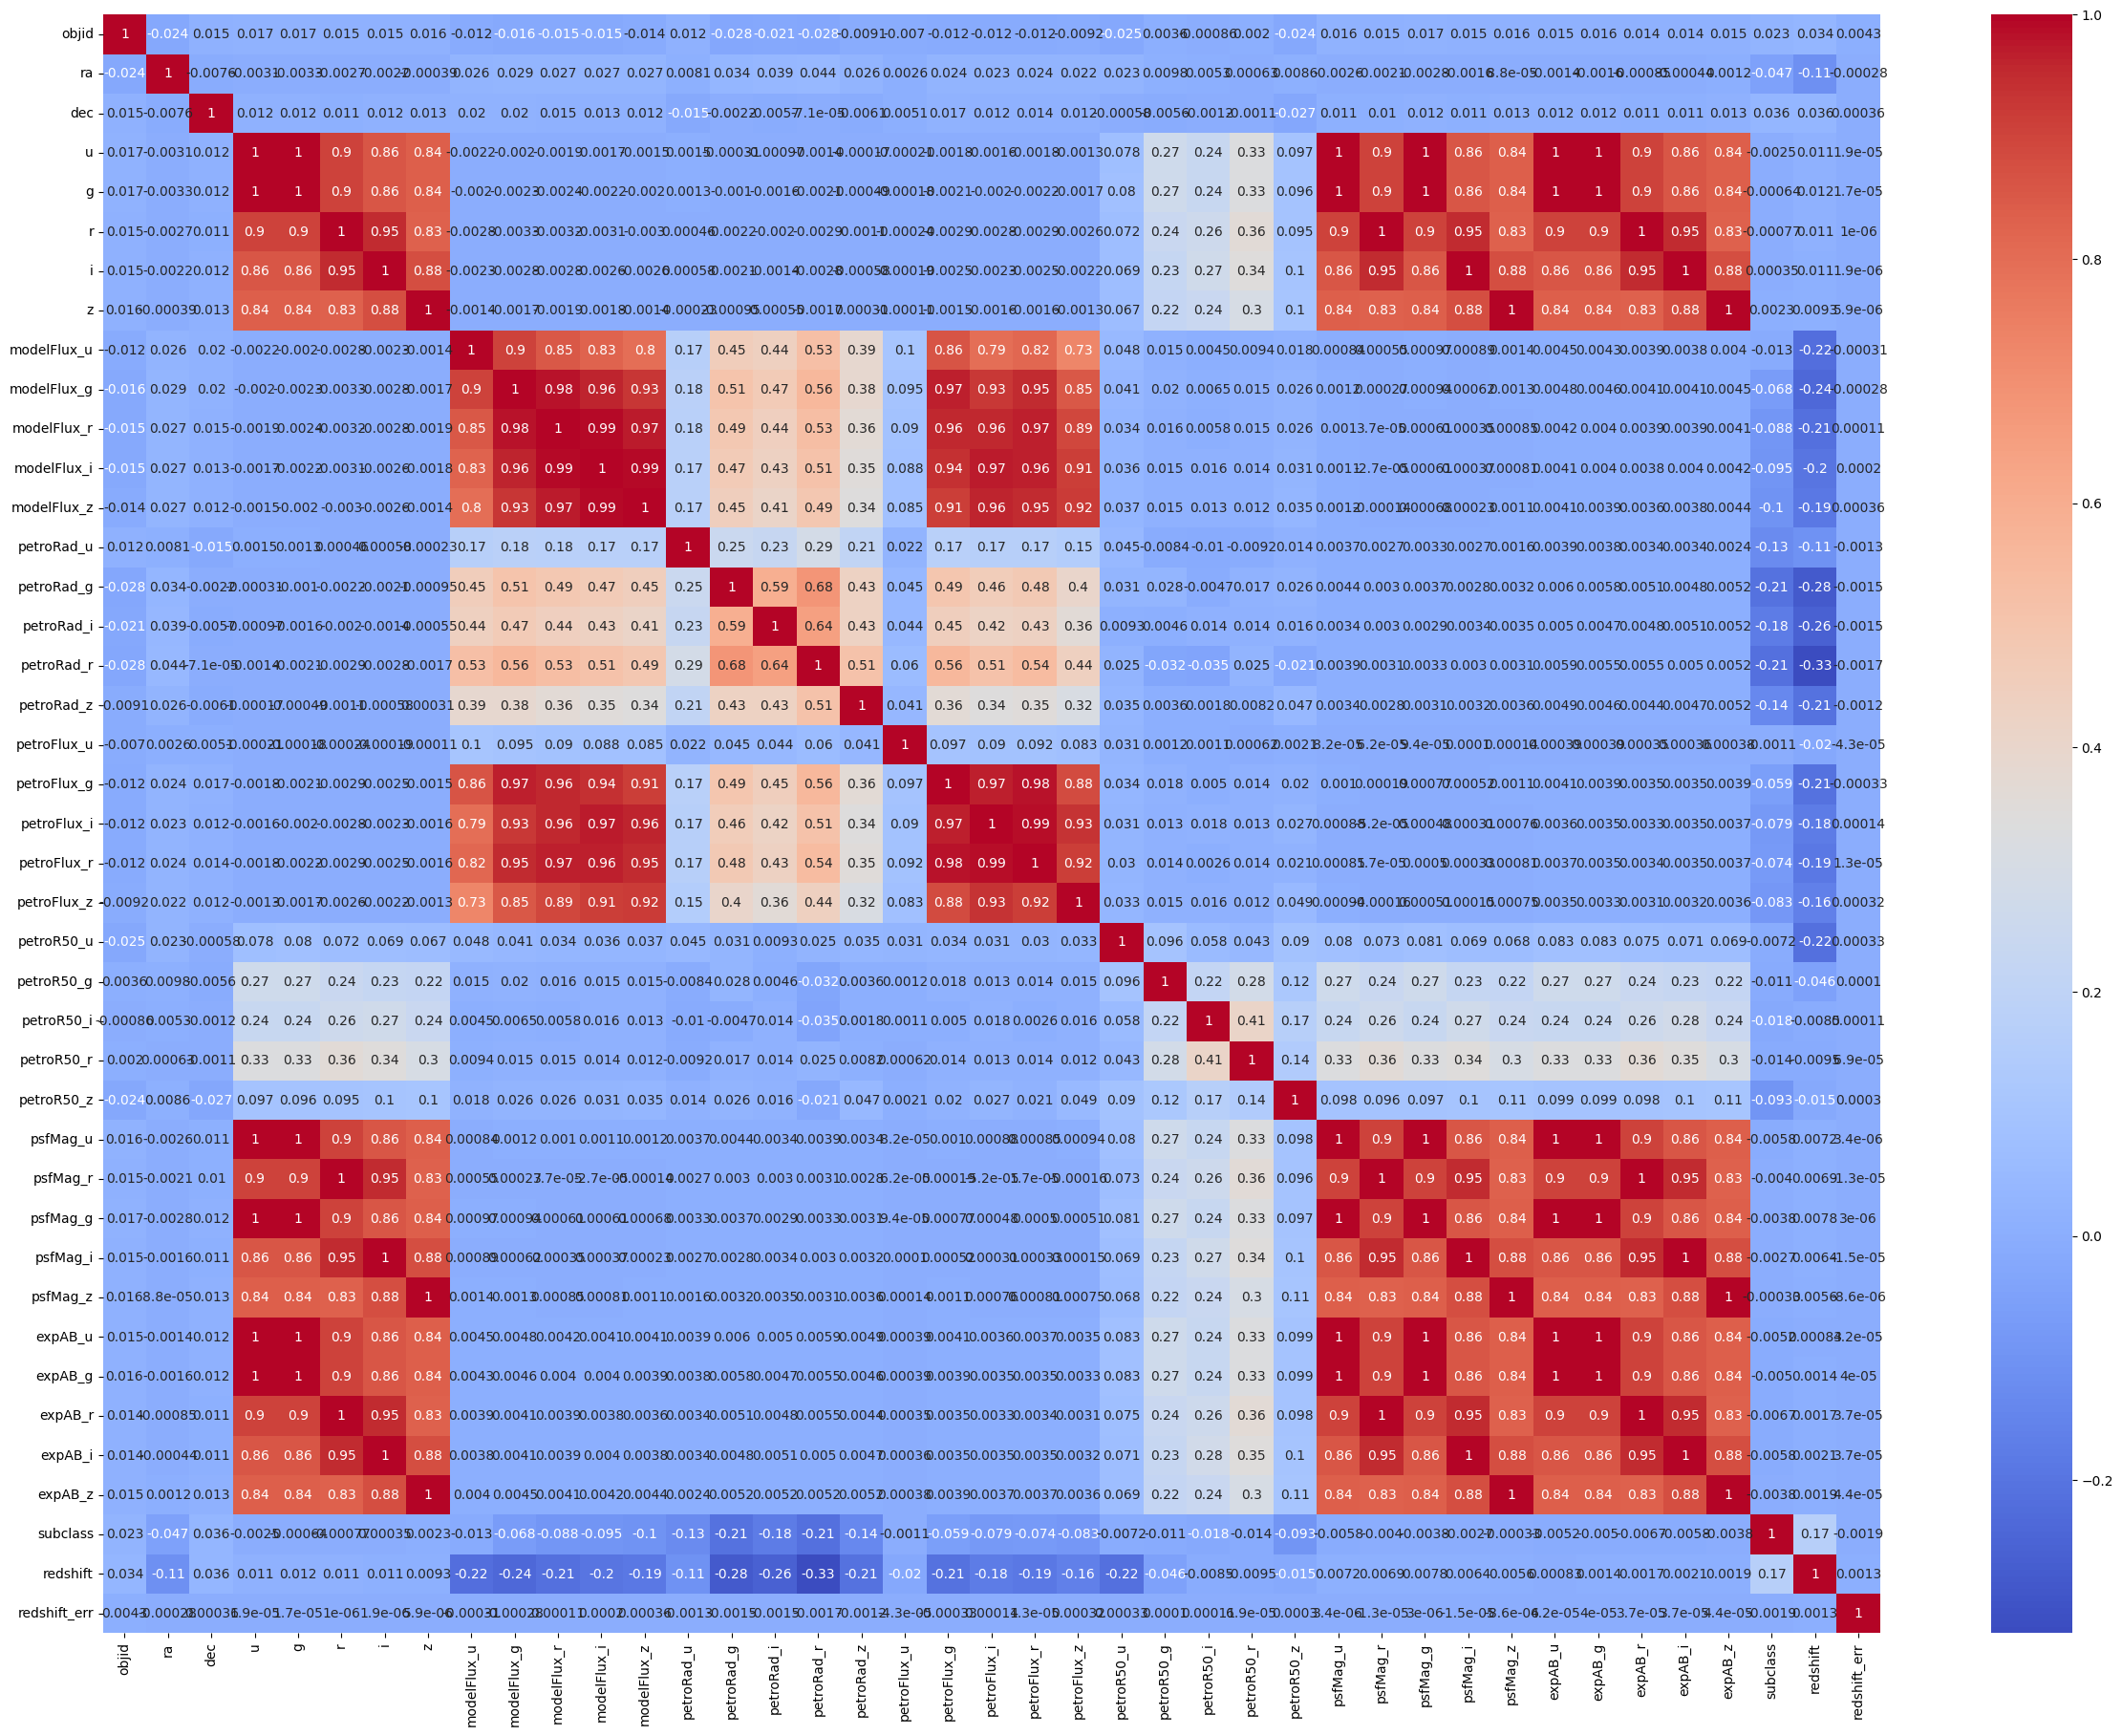

In [17]:
plt.figure(figsize=(30,22))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [18]:
quant=df['u'].quantile (q = [0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    20.079470
0.25    18.762215
Name: u, dtype: float64
20.07947
18.762214999999998
1.317255000000003
22.055352500000005
16.786332499999993


In [19]:
X = df.drop(['subclass'], axis=1)
y = df['subclass']


In [20]:
# Drop the target column and non-numeric columns
X = df.drop(['subclass', 'class'], axis=1)  # 'class' is string
y = df['subclass']

# Select numeric columns only
X = X.select_dtypes(include=[np.number])

# Now use SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['specobjid', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroR50_z', 'redshift'],
      dtype='object')


In [21]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df.drop(['subclass', 'class'], axis=1)
y = df['subclass']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to a Series and set name
y_res = pd.Series(y_resampled, name='subclass')

# Use value_counts with sort_index and reset the name explicitly
y_counts = y_res.value_counts().sort_index()
y_counts.name = 'subclass'

print(y_counts)


subclass
0    74993
1    74993
Name: subclass, dtype: int64


In [22]:
#top 10 features from SelectKBest
top_features = ['specobjid', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 
                'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 
                'petroR50_z', 'redshift']

# x is the feature set
x = df[top_features]

# y is the target
y = df['subclass']  # make sure to use the original df where 'subclass' exists

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Fit on training data and transform
x_train_scaled = sc.fit_transform(x_train)

# Transform test data (without fitting again)
x_test_scaled = sc.transform(x_test)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate using classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84     14976
           1       0.54      0.55      0.54      5024

    accuracy                           0.77     20000
   macro avg       0.69      0.70      0.69     20000
weighted avg       0.77      0.77      0.77     20000



In [25]:
print(accuracy_score(y_test, y_pred))


0.76825


In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score

# Create the model
lg = LogisticRegression(max_iter=1000)

# Train the model
lg = lg.fit(x_train, y_train)

# Predict
y_pred = lg.predict(x_test)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("--------------------------------------------------")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_pred,y_test))


Confusion Matrix:
 [[14976     0]
 [ 5024     0]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     14976
           1       0.00      0.00      0.00      5024

    accuracy                           0.75     20000
   macro avg       0.37      0.50      0.43     20000
weighted avg       0.56      0.75      0.64     20000

Accuracy: 0.7488


In [27]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Random Forest classifier
RF = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
RF.fit(x_train, y_train)

# Predictions on training and testing data
RFtrain = RF.predict(x_train)
RFtest = RF.predict(x_test)

# Confusion Matrix
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, RFtrain))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, RFtest))
print("--------------------------------------------------")

# Classification Report
print("Classification Report (Train):\n", classification_report(y_train, RFtrain))
print("Classification Report (Test):\n", classification_report(y_test, RFtest))
print("--------------------------------------------------")

# Accuracy
from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, RFtrain))
print("Testing Accuracy:", accuracy_score(y_test, RFtest))


Confusion Matrix (Train):
 [[60017     0]
 [    0 19983]]
Confusion Matrix (Test):
 [[14029   947]
 [ 2289  2735]]
--------------------------------------------------
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60017
           1       1.00      1.00      1.00     19983

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     14976
           1       0.74      0.54      0.63      5024

    accuracy                           0.84     20000
   macro avg       0.80      0.74      0.76     20000
weighted avg       0.83      0.84      0.83     20000

--------------------------------------------------
Training Accuracy: 1.0
Testing Accuracy: 0.8382


In [28]:
import pickle

# Save the Random Forest model
pickle.dump(RF, open("RF.pkl", "wb"))


In [29]:
# Example: Predict using Random Forest model


sample1 = [8.17519e18, 34.98175, 50.64961, 2.969037,4.252946,3.101782, 3.46188, 3.071923,1.289375, 1.49e-05]


# Make predictions
print("Prediction for sample 1:", RF.predict([sample1]))



Prediction for sample 1: [0]
